In [4]:
from src.scripts.common import *
from src.scripts.experiments_util import *

# todo
# [D] data download
# [D] set data dir
# [ ] draw makro and mikro curve for one dataset (only those two!)
#       [ ] combine 3 classifiers (one per dataset/representation)
#       [ ] combine 3 representation (one chart per dataset/classifier)
# [ ] adjust functions for binary and multiclass

# [D] - run and save predictions  for all classifiers/dataset/states

In [5]:
PREDICTIONS_DIR = "C:\\Users\\Asia\\Documents\\Projekty\\PyCharm Projects\\text-classification\\results\\predictions\\"
DIAGRAMS_DIR = "C:\\Users\\Asia\\Documents\\Projekty\\PyCharm Projects\\text-classification\\results\\diagrams\\"



In [1]:
states = [State.STD, State.BIO, State.DOUBLE]
for d in Dataset:
    for params in [KnnParams(), RandomForestParams(), LogisticRegressionParams(), SVCParams()]:
        for s in [state for state in State if state != State.RAW]:

        
    print("")

NameError: name 'Dataset' is not defined

In [50]:
d = Dataset.FINE_FOODS
s = State.STD
params = LogisticRegressionParams()
params2 = RandomForestParams()
X_train, y_train, X_test, y_test = get_train_test(d,s)

In [51]:
y_train

602     5
4503    3
5146    1
2104    5
592     5
       ..
2887    4
1028    5
7697    2
4578    4
7414    5
Name: TARGET, Length: 8000, dtype: int64

In [82]:
import re
AUC_SCORE_RE = re.compile('AUC = [0-9.]+')
from yellowbrick.classifier import ROCAUC
import matplotlib.pyplot as plt

def draw_plots(X_train, X_test, y_train, y_test, model, state):
    fig, ax = plt.subplots()
    visualizer = ROCAUC(model,ax=ax, per_class=False,micro=False)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.finalize()
    # get data from plotted macro curve
    lines = ax.get_lines()
    micro_line = lines[0]
    legend = ax.get_legend()
    auc =AUC_SCORE_RE.search(legend.get_texts()[0].get_text()).group(0)
    print(auc)
    repr = STATE_LABELS[state]
    label = f"Reprezentacja {repr} ({auc})"
    return micro_line.get_xdata(), micro_line.get_ydata(),label

AUC = 0.96
AUC = 0.96


KeyboardInterrupt: 

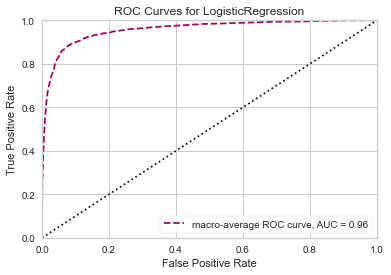

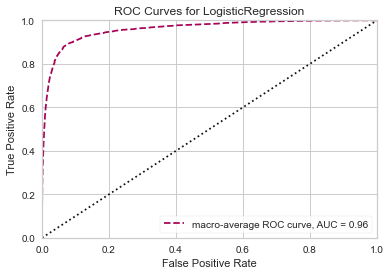

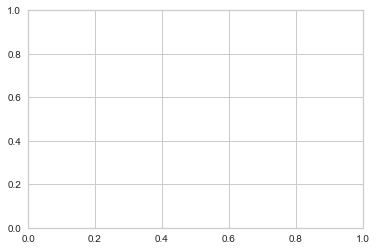

In [83]:
states = [State.STD, State.BIO, State.DOUBLE]
colors = ["red", "blue", "yellow"]
reference_color = ["grey"]

for d in Dataset:
    for params in [LogisticRegressionParams(), KnnParams(), RandomForestParams()]:
        lines = []
        for s in [state for state in State if state != State.RAW]:
            X_train, y_train, X_test, y_test = get_train_test(d,s)
            model = params.get_classifier(d,s)
            line = draw_plots(X_train, X_test, y_train,y_test, model, s)
            lines.append(line)
        fig, ax = plt.subplots()
        for l, idx in enumerate(lines):
            ax.plot(l[0],l[1],linestyle="solid",label=l[2], color=colors[idx])
        ax.plot([0, 1], [0, 1], linestyle="dotted", c=reference_color)
        ax.set_xlabel("Swoistość")
        ax.set_ylabel("Czułość")
        ax.set_title(f"Krzywe ROC dla klasyfikatora {params.clf_name()} i zbioru {DATASET_LABELS[d]}")
        plt.show(f"{DIAGRAMS_DIR}{d}-{params.clf_name()}.png")

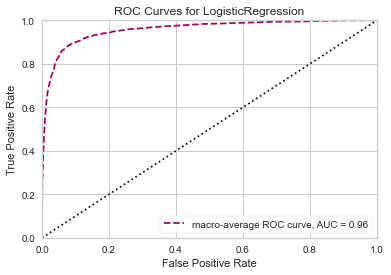

In [73]:
X_train, y_train, X_test, y_test = get_train_test(d,s)
model = params.get_classifier(d,s)
fig, ax = plt.subplots()
visualizer = ROCAUC(model,ax=ax, per_class=False,micro=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()# get data from plotted macro curve
lines = ax.get_lines()


In [79]:
legend = ax.get_legend()
legend.get_texts()[0].get_text()

'macro-average ROC curve, AUC = 0.96'

In [56]:
lines = ax.get_lines()
len(lines)

4

In [58]:
lines[0].set_color("blue")
plt.show()

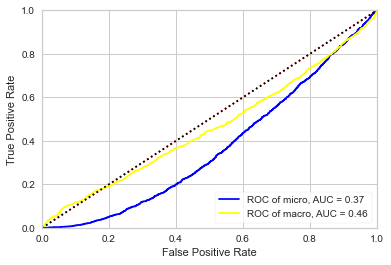

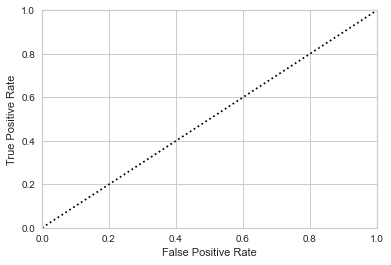